In [1]:
import os
import pandas as pd
from IPython.display import IFrame

# Create directory for output files generated in this notebook
NOTEBOOK_RESULTS_DIR = 'results/usage_of_UICer'
os.makedirs(NOTEBOOK_RESULTS_DIR, exist_ok=True)

# `UICer.py`: Unbalanced Interaction Caller

We implemented the calling of unbalanced interactions in the Python script `UICer.py`. The script performs the following processing steps:

1. **Randomization:** If no classification threshold is specified, then a threshold is determined using a randomization procedure so that the FDR remains below 5%.

2. **Calling of unbalanced interactions:** All interactions that do not have enough read pairs to be classified as unbalanced at the chosen classification threshold are discarded. The remaining interactions are classified as unbalanced or balanced and assigned a score.

3. **Selection of comparison sets:** From the unbalanced and balanced interactions, two comparison sets are selected that are as large as possible and comparable with respect to their total read pair counts per interaction.

Depending on the size of the input and the number of iterations, the randomization procedure can be very computationally intensive. We have prepared a small file with 64,000 interactions for testing and demonstration purposes. The script can be executed as follows:

[INFO] Input parameters
	[INFO] --out-prefix: results/usage_of_UICer/DEMO
	[INFO] --description-tag: DEMO
	[INFO] --diachromatic-interaction-file:
		[INFO] ../../tests/data/diachromatic_interaction_file_demo_64000.tsv.gz
	[INFO] --min-inter-dist: 20,000
	[INFO] --read-pair-counts-rule: ht
	[INFO] --p-value-threshold: None
	[INFO] --random-seed-shuff-inter: 1
		[INFO] Will determine a P-value threshold so that the FDR is kept below: 0.05
		[INFO] --fdr-threshold: 0.05000
		[INFO] --nominal-alpha-max: 0.10000
		[INFO] --nominal-alpha-step: 0.00001
		[INFO] --iter-num: 100
		[INFO] --random-seed: 0
		[INFO] --thread-num: 2
		[INFO] Use '--fdr-threshold' to set your own FDR threshold.
		[INFO] Or use '--p-value-threshold' to skip the FDR procedure.

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../../tests/data/diachromatic_interaction_file_demo_64000.tsv.gz
	[INFO] Set size: 64,000
[INFO] ... done.

[INFO] Shuffling dictionary with interactions ...
	[INFO] Random seed: 1
[INFO]

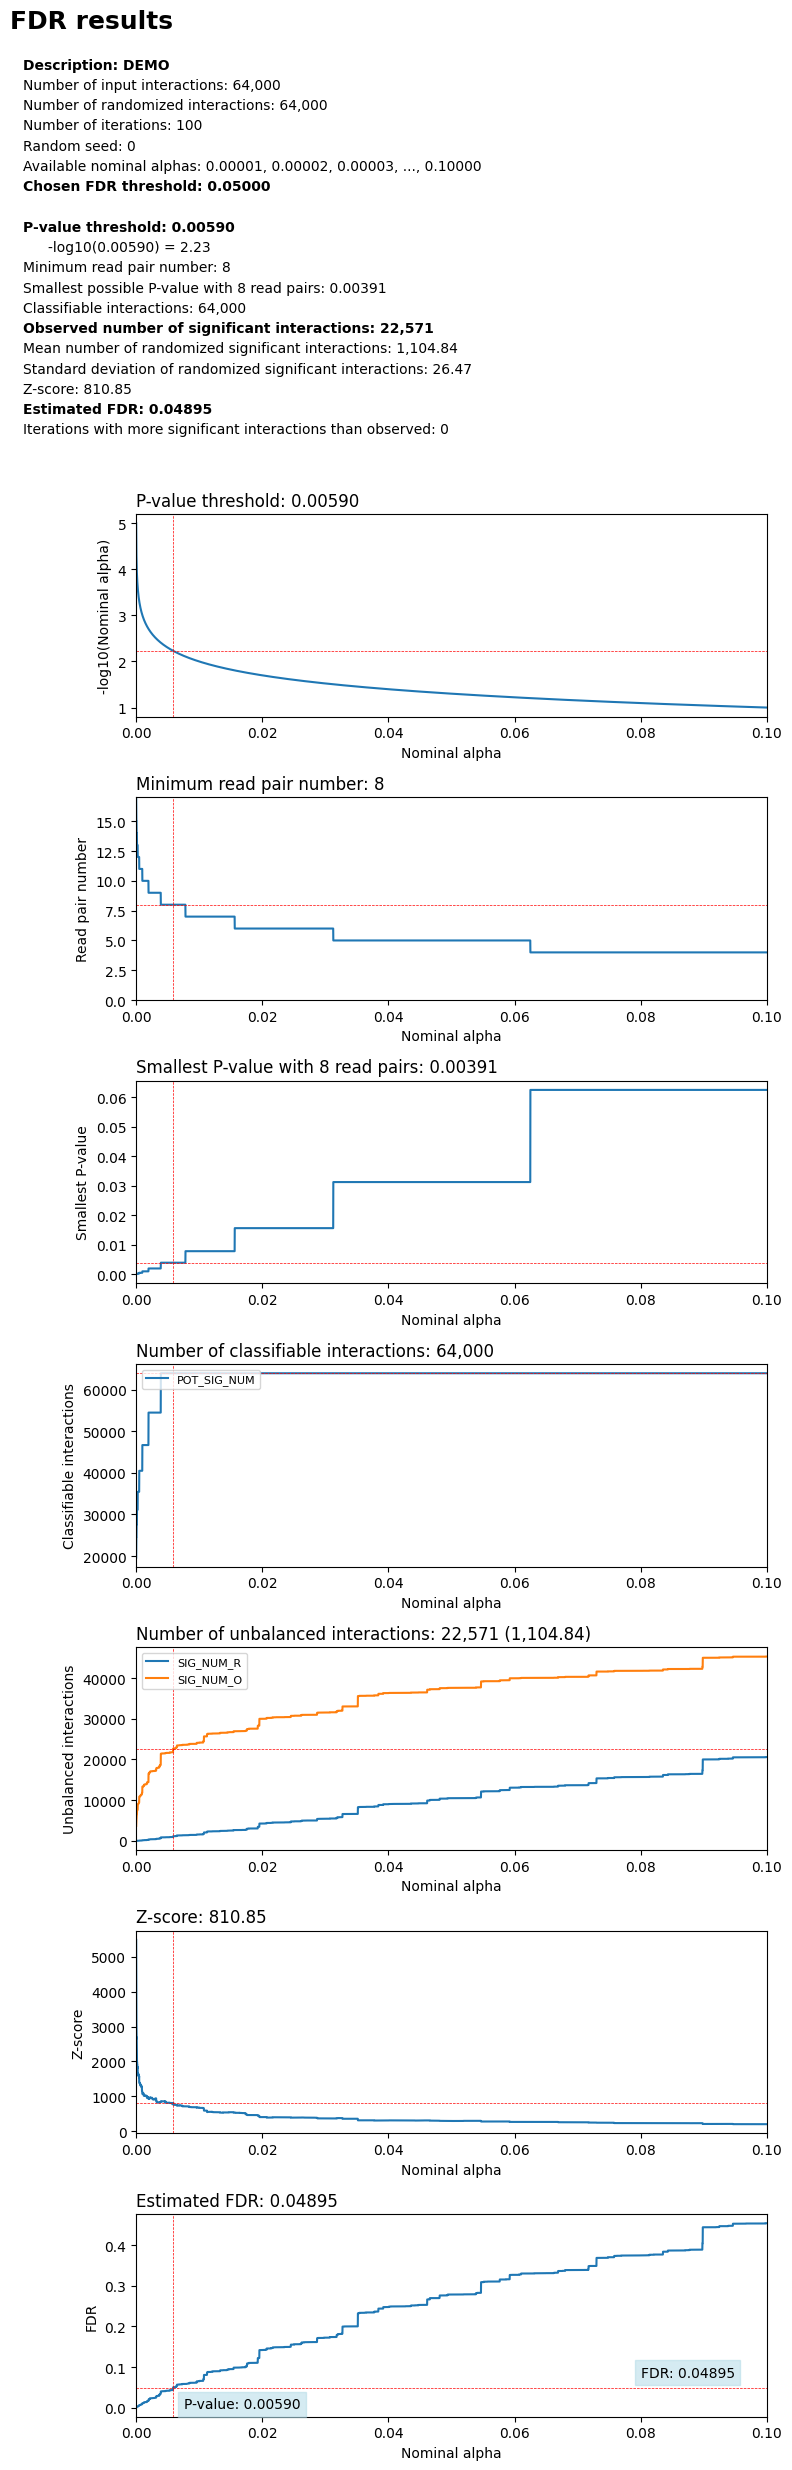

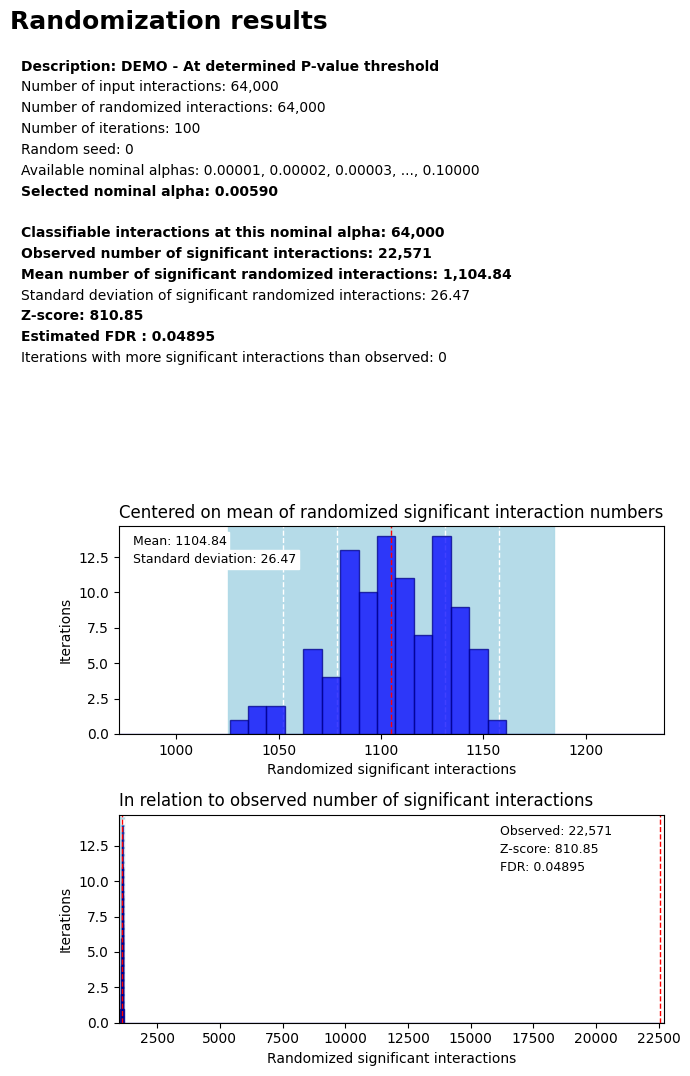

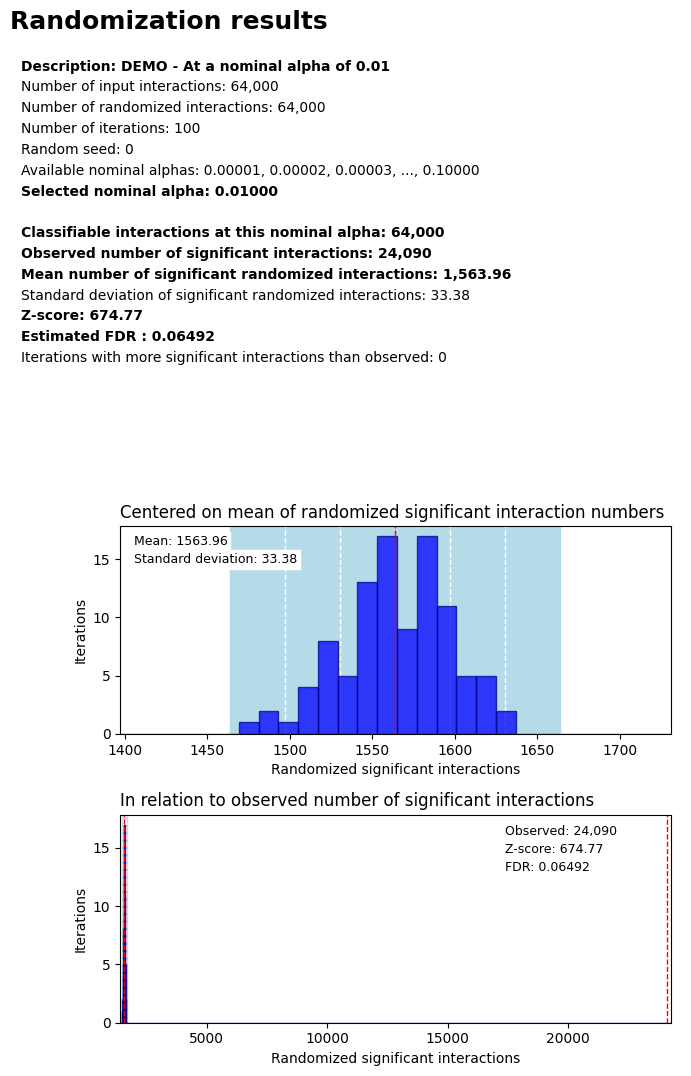

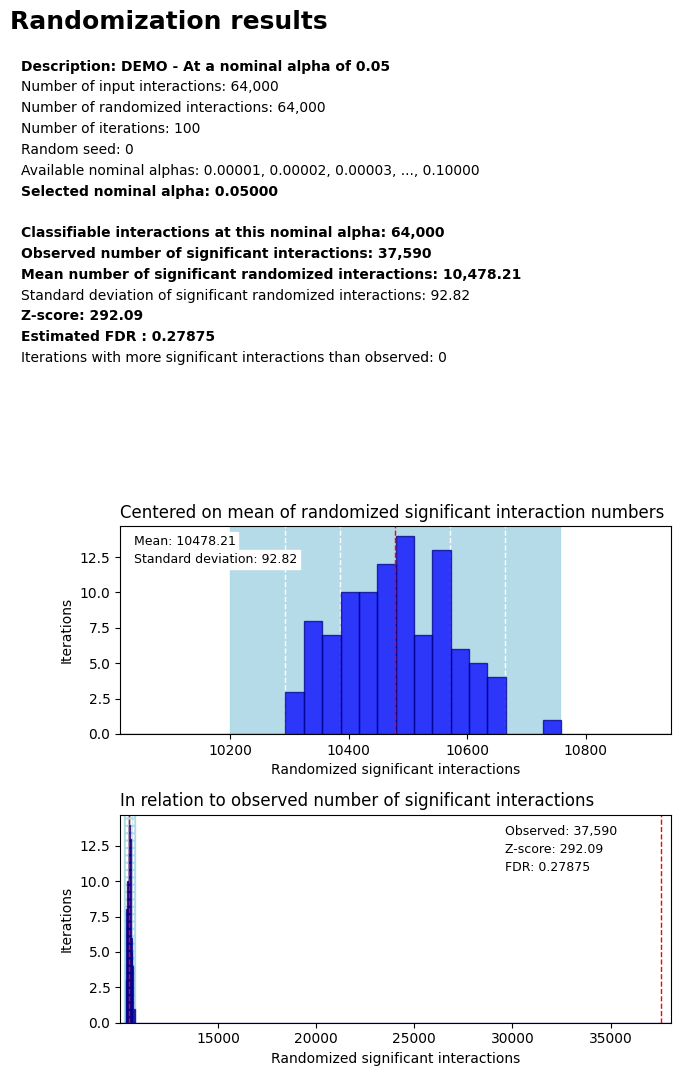

In [2]:
%run ../../UICer.py \
--out-prefix $NOTEBOOK_RESULTS_DIR/DEMO \
--description-tag "DEMO" \
--diachromatic-interaction-file ../../tests/data/diachromatic_interaction_file_demo_64000.tsv.gz \
--min-inter-dist 20000 \
--read-pair-counts-rule ht \
--fdr-threshold 0.05 \
--nominal-alpha-max 0.10000 \
--nominal-alpha-step 0.00001 \
--iter-num 100 \
--random-seed 0 \
--thread-num 2

## Command line arguments

The `UICer.py` script can be executed with the following command line arguments: 


| Argument | Meaning |
| :--- | :--- |
| `--out-prefix <String>` | Prefix for all generated files, which can also include a path. |
| `--description-tag <String>` | Short description tag that appears in generated tables and plots. |
| `--diachromatic-interaction-file <String>` | Path to an input file in Diachromatic interaction format. |
| `--min-inter-dist <Integer>` | Minimum interaction distance. Shorter interactions are not included in the analysis. |
| `--read-pair-counts-rule <String>` | Rule by which interactions are scored.<br>By default, the sum of the two highest counts is compared against<br>the sum of the two lowest counts using a binomial test (`ht`).<br>Alternatively, the sum of counts for class 0 and class 1 read pairs can be compared against<br>the sum of class 2 and class 3 read pairs (`st`).<br>In both cases, the classification score is the P-value from the binomial test. |
| `--fdr-threshold <Float>` | By default, the classification (P-value) threshold is chosen using a randomization procedure so that the estimated FDR remains below this threshold. |
| `--nominal-alpha-max <Float>` | Maximum classification threshold at which it is checked whether the FDR remains below the specified FDR threshold. |
| `--nominal-alpha-step <Float>` | Step size for the checked classification thresholds. |
| `--iter-num <Integer>` | Number of randomization iterations. |
| `--random-seed <Integer>` | Random seed that is used for the first iteration. The random seed is incremented by `1` for each further iteration. |
| `--thread-num <Integer>` | The randomization iterations can be performed in parallel. |
| `--p-value-threshold <Float>` | By default, the classification threshold is determined via the randomization procedure. If a classification threshold is specified,<br>then this threshold will be used and no randomization will be performed. |


## Generated files

The following files are generated:

- ``DEMO_reports.txt``
- ``DEMO_randomization_plot.pdf``
- ``DEMO_randomization_table.txt``
- ``DEMO_randomization_histogram_at_threshold.pdf``
- ``DEMO_randomization_histogram_at_001.pdf``
- ``DEMO_randomization_histogram_at_005.pdf``
- ``DEMO_evaluated_and_categorized_interactions.tsv.gz``

The content of these files is described below.

### ``DEMO_reports.txt``

This file contains a report on each individual processing step.

In [3]:
!cat $NOTEBOOK_RESULTS_DIR/DEMO_reports.txt

[INFO] Input parameters
	[INFO] --out-prefix: results/usage_of_UICer/DEMO
	[INFO] --description-tag: DEMO
	[INFO] --diachromatic-interaction-file:
		[INFO] ../../tests/data/diachromatic_interaction_file_demo_64000.tsv.gz
	[INFO] --min-inter-dist: 20,000
	[INFO] --read-pair-counts-rule: ht
	[INFO] --p-value-threshold: None
	[INFO] --random-seed-shuff-inter: 1
		[INFO] Will determine a P-value threshold so that the FDR is kept below: 0.05
		[INFO] --fdr-threshold: 0.05000
		[INFO] --nominal-alpha-max: 0.10000
		[INFO] --nominal-alpha-step: 0.00001
		[INFO] --iter-num: 100
		[INFO] --random-seed: 0
		[INFO] --thread-num: 2
		[INFO] Use '--fdr-threshold' to set your own FDR threshold.
		[INFO] Or use '--p-value-threshold' to skip the FDR procedure.

[INFO] Report on reading files:
	[INFO] Read interaction data from 1 files:
		[INFO] 64,000 interactions from: 
			[INFO] ../../tests/data/diachromatic_interaction_file_demo_64000.tsv.gz
			[INFO] Minimum number of read pairs: 4
			[INFO] Skipp

The file contains tab-delimited lines containing summary statistics for the different processing steps, which can be extracted using corresponding tags. For example, the following command can be used to extract the lines for the randomization procedure:

In [4]:
!cat $NOTEBOOK_RESULTS_DIR/DEMO_reports.txt | grep ':TR_RANDOM:' > tr_random.txt
pd.read_csv('tr_random.txt', sep='\t')

,:TR_RANDOM:,DESCRIPTION,INPUT_I_NUM,ITER_NUM,RANDOM_SEED,NOMINAL_ALPHA,POT_SIG_NUM,SIG_NUM_O,SIG_NUM_R_MEAN,SIG_NUM_R_SD,Z_SCORE,FDR,SIG_NUM_R_GT_OBS
0,:TR_RANDOM:,DEMO,64000,100,0,0.0059,64000,22571,1104.84,26.47,810.85,0.04895,0
1,:TR_RANDOM:,DEMO,64000,100,0,0.0100,64000,24090,1563.96,33.38,674.77,0.06492,0
2,:TR_RANDOM:,DEMO,64000,100,0,0.0500,64000,37590,10478.21,92.82,292.09,0.27875,0
3,:TR_RANDOM:,DEMO,64000,100,0,0.0500,64000,37590,10478.21,92.82,292.09,0.27875,0


There are 4 rows for the randomization procedure: a header row, a row for the classification threshold determined at an FDR of 5% and two rows for the classification thresholds `0.05` and `0.01` (`NOMINAL_ALPHA`).

| Column name | Content |
| :--- | :--- |
| `INPUT_I_NUM` | Number of interactions in the input file. |
| `ITER_NUM` | Number of iterations performed. |
| `RANDOM_SEED` | Random seed. |
| ``NOMINAL_ALPHA`` | Classification threshold. |
| `POT_SIG_NUM` | Number of classifiable interactions.  |
| `SIG_NUM_O` | Number of interactions classified as unbalanced. |
| `SIG_NUM_R_MEAN` | Mean number of randomized unbalanced interactions. |
| `SIG_NUM_R_SD` | Standard deviation of randomized unbalanced interactions. |
| `Z_SCORE` | Z-Score calculated as `(SIG_NUM_O - SIG_NUM_R_MEAN)/SIG_NUM_R_SD`. |
| `FDR` | False discovery rate calculated as `SIG_NUM_R_MEAN/SIG_NUM_O`. |
| `SIG_NUM_R_GT_OBS` | Number of iterations with more unbalanced interactions than originally observed. |

The following command can be used to extract the rows for the evaluation and categorization at the determined P-value threshold:

In [5]:
!cat $NOTEBOOK_RESULTS_DIR/DEMO_reports.txt | grep ':TR_EVAL_CAT:' > tr_eval_cat.txt
pd.read_csv('tr_eval_cat.txt', sep='\t')

,:TR_EVAL_CAT:,DESCRIPTION,PVAL_THRESH,MIN_RP,MIN_RP_PVAL,N_PROCESSED,N_DISCARDED,N_BALANCED,N_UNBALANCED
0,:TR_EVAL_CAT:,results/usage_of_UICer/DEMO,0.0059,8,0.00391,64000,0,41429,22571


The following command can be used to extract the lines for the classification of interactions at the determined (or specified) threshold:

| Column name | Content |
| :--- | :--- |
| `PVAL_THRESH` | Determined or specified classification threshold. |
| `MIN_RP` | Smallest total read pair count required to classify interactions. |
| `MIN_RP_PVAL` | Smallest possible P-value score that corresponds to<br>the smallest total read pair count required for classification. |
| ``N_PROCESSED`` | Number of interactions in the input file. |
| `N_DISCARDED` | Number of interactions that were discarded because they were not classifiable. |
| `N_BALANCED` | Number of balanced interactions. |
| `N_UNBALANCED` | Number of unbalanced interactions. |

The following command can be used to extract the lines for the selection of reference interactions:

In [6]:
!cat $NOTEBOOK_RESULTS_DIR/DEMO_reports.txt | grep ':TR_SELECT:' > tr_select.txt
pd.read_csv('tr_select.txt', sep='\t')

,:TR_SELECT:,DESCRIPTION,UX_NN,UX_NE,UX_EN,UX_EE,UX_TOTAL,UR_NN,UR_NE,UR_EN,...,BR_NN,BR_NE,BR_EN,BR_EE,BR_TOTAL,BX_NN,BX_NE,BX_EN,BX_EE,BX_TOTAL
0,:TR_SELECT:,results/usage_of_UICer/DEMO,55,190,182,153,580,46,10347,10416,...,46,10482,10281,1182,21991,10,8775,9084,1569,19438


We select two equally sized comparison sets of unbalanced (`UR`) and balanced interactions (`BR`) that are comparable in terms of their distributions of total read pair counts per interaction. We label interactions that do not belong to the comparison set with `UX` and `BX`. When selecting reference interactions, we also take into account the enrichment status of the associated fragments (``E`` stands for enriched and ``N`` for not enriched). An interaction can have four different enrichment states: ``NN``,``NE``,``EN`` or ``EE``. For instance, `UR` and `BR` interactions with enrichment status `EN` form two comparison sets of approximately the same size that are comparable with respect to their total read pair counts per interaction.

| Column name | Content |
| :--- | :--- |
| `UX_NN` | Number of **unbalanced interactions** with enrichment status `NN`<br>that were **not selected** for the comparison set. |
| `UX_NE` | Number of **unbalanced interactions** with enrichment status `NE`<br>that were **not selected** for the comparison set. |
| `...` | ... |
| `UR_EN` | Number of **unbalanced interactions** with enrichment status `EN`<br>that were **selected** for the comparison set. |
| `...` | ... |
| `BR_EN` | Number of **balanced interactions** with enrichment status `EN`<br>that were **selected** for the comparison set. |
| `...` | ... |
| `BX_EE` | Number of **balanced interactions** with enrichment status `EE`<br>that were **not selected** for the comparison set. |
| `BX_TOTAL` | Total number of **balanced interactions** with enrichment states `NN`, `NE`, `EN` and `EE`<br>that were **not selected** for the comparison set. |

### `DEMO_randomization_plot.pdf`

This file contains randomization plots for the selected range of nominal alphas:

`[1 * nominal-alpha-step, 2 * nominal-alpha-step, ..., nominal-alpha-max]`.

It consists of a header containing the input arguments and the results for the largest nominal alpha at which the FDR remains below 5% followed by seven plots.

| Plot | Content |
| :--- | :--- |
| Decadic logarithm of nominal alpha | Red dashed lines are drawn at the largest nominal alpha with an FDR below the chosen threshold. This nominal alpha is used as the classification threshold. |
| Minimum read pair count per interaction | Minimum number of read pairs required for classification at a given nominal alpha. |
| Most extreme binomial P-value score given minimum read pair count | The smallest binomial P-value score given the minimum number of read pairs required for classification. |
| Number of classifiable interactions | Number of classifiable interactions at each given nominal alpha. |
| Number of unbalanced interactions | The number of interactions classified as unbalanced before (orange) and after randomization (blue). |
| Z-Score | Calculated from the originally observed number of unbalanced interactions and the mean number and standard deviation of randomized unbalanced interactions across all iterations. |
| Estimated FDR | The ratio of the mean number of randomized unbalanced interactions and the observed number of unbalanced interactions. |

In [7]:
# If there are problems displaying the PDF file, use the Firefox browser
IFrame(NOTEBOOK_RESULTS_DIR + '/DEMO_randomization_plot.pdf', width=900, height=400)

### ``DEMO_randomization_table.txt``

This file contains a table with the values plotted in ``DEMO_1_randomization_plot.pdf``.

In [8]:
!head -n 10 $NOTEBOOK_RESULTS_DIR/DEMO_randomization_table.txt > head_randomization_table.txt
pd.read_csv('head_randomization_table.txt', sep='\t')

,:TR_RANDOM:,DESCRIPTION,INPUT_I_NUM,ITER_NUM,RANDOM_SEED,NOMINAL_ALPHA,POT_SIG_NUM,SIG_NUM_O,SIG_NUM_R_MEAN,SIG_NUM_R_SD,Z_SCORE,FDR,SIG_NUM_R_GT_OBS
0,:TR_RANDOM:,DEMO,64000,100,0,0.00001,19638,3680,0.48,0.67,5487.54,0.00013,0
1,:TR_RANDOM:,DEMO,64000,100,0,0.00002,21952,4309,1.03,0.93,4621.02,0.00024,0
2,:TR_RANDOM:,DEMO,64000,100,0,0.00003,21952,4519,1.44,1.18,3836.72,0.00032,0
3,:TR_RANDOM:,DEMO,64000,100,0,0.00004,24628,5201,2.69,1.66,3132.48,0.00052,0
4,:TR_RANDOM:,DEMO,64000,100,0,0.00005,24628,5261,2.86,1.70,3098.17,0.00054,0
5,:TR_RANDOM:,DEMO,64000,100,0,0.00006,24628,5370,3.37,1.87,2871.42,0.00063,0
6,:TR_RANDOM:,DEMO,64000,100,0,0.00007,27615,6032,4.75,2.14,2814.05,0.00079,0
7,:TR_RANDOM:,DEMO,64000,100,0,0.00008,27615,6223,5.89,2.34,2656.33,0.00095,0
8,:TR_RANDOM:,DEMO,64000,100,0,0.00009,27615,6273,6.28,2.33,2691.39,0.00100,0


### ``DEMO_randomization_histogram_at_threshold.pdf``

This file contains two histograms for the numbers of randomized unbalanced interactions from all iterations at the determined classification threshold. The first histogram is centered on the mean number of randomized unbalanced interactions. The range of three standard deviations to the left and right of the mean is highlighted in light blue. The second histogram shows the same data, but the distribution is shown along with the originally observed number of unbalanced interactions (red dashed line).

In [9]:
IFrame(NOTEBOOK_RESULTS_DIR + '/DEMO_randomization_histogram_at_threshold.pdf', width=900, height=500)

### ``DEMO_randomization_histogram_at_001.pdf``

This file contains the two histograms for the number of randomized unbalanced interactions at a nominal alpha of `0.01`.

In [10]:
IFrame(NOTEBOOK_RESULTS_DIR + '/DEMO_randomization_histogram_at_001.pdf', width=900, height=500)

### ``DEMO_randomization_histogram_at_005.pdf``

This file contains the two histograms for the number of randomized unbalanced interactions at a nominal alpha of `0.05`.

In [11]:
IFrame(NOTEBOOK_RESULTS_DIR + '/DEMO_randomization_histogram_at_005.pdf', width=900, height=500)

### ``DEMO_evaluated_and_categorized_interactions.tsv.gz``

This file contains the interactions with associated p-value scores and labels for the different interaction categories. The format corresponds to that of Diachromatic with two additional columns. The P-value scores correspond to the negative decadic logarithm of the P-values from the binomial test. The interactions are labeled as follows:

1. `UX`: Unbalanced interaction for which no balanced reference interaction could be selected.
2. `UR`: Unbalanced interaction for which a balanced counterpart interaction with identical total read pair count was selected.
3. `BR`: Balanced interaction that was selected as a reference interaction.
4. `BX`: Balanced interaction that was not selected as a reference interaction.

In [12]:
col_names = ['chrA','staA','endA','enrA','chrB','staB','endB','enrB','rp_counts', 'pv_score', 'i_cat']
i_file = NOTEBOOK_RESULTS_DIR + '/DEMO_evaluated_and_categorized_interactions.tsv.gz'
pd.read_csv(i_file, compression='gzip',  sep='\t', names=col_names)

,chrA,staA,endA,enrA,chrB,staB,endB,enrB,rp_counts,pv_score,i_cat
0,chr2,54661551,54665147,E,chr2,54778275,54783332,N,7:5:5:6,0.47,BR
1,chr4,17808486,17812015,E,chr4,18074322,18077653,N,6:3:4:4,0.50,BR
2,chr4,5145610,5148542,N,chr4,5708114,5716401,E,1:3:2:2,0.44,BR
3,chr10,101693907,101698980,E,chr10,102147462,102148941,N,0:8:0:2,3.01,UR
4,chr12,53775564,53777517,N,chr12,54008223,54013374,E,3:10:5:5,0.98,BR
...,...,...,...,...,...,...,...,...,...,...,...
63995,chr17,44649395,44659094,E,chr17,44921015,44930962,N,1:11:1:6,3.44,UR
63996,chr4,184320940,184324208,N,chr4,184825046,184848277,E,3:11:5:5,1.12,BX
63997,chr1,36122932,36134741,E,chr1,36170529,36177638,N,1:21:3:21,8.59,UR
63998,chr6,117672173,117678648,E,chr6,118385676,118387915,N,5:2:1:2,0.76,BX
